In [96]:
import torch
import torch.nn.functional as F
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt 

In [97]:
device = "cpu"

In [98]:
data = Path("imgcls/")
image = data / "data1"

if image.is_dir():
    print(f"{image} directory exists")
else:
    print(f"{image} does not exist")
    image.mkdir(parents=True, exist_ok=True)

imgcls\data1 directory exists


In [99]:
import os
def info_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [100]:
info_dir(image)

There are 2 directories and 0 images in 'imgcls\data1'.
There are 2 directories and 0 images in 'imgcls\data1\test'.
There are 0 directories and 24 images in 'imgcls\data1\test\blackwidow'.
There are 0 directories and 24 images in 'imgcls\data1\test\ironman'.
There are 2 directories and 0 images in 'imgcls\data1\train'.
There are 0 directories and 63 images in 'imgcls\data1\train\blackwidow'.
There are 0 directories and 77 images in 'imgcls\data1\train\ironman'.


In [101]:
train_dir = image / "train"
test_dir  = image / "test"

train_dir, test_dir

(WindowsPath('imgcls/data1/train'), WindowsPath('imgcls/data1/test'))

Random image path: imgcls\data1\test\ironman\4001018-0.jpg
Image class: ironman
Image height: 720
Image width: 1280


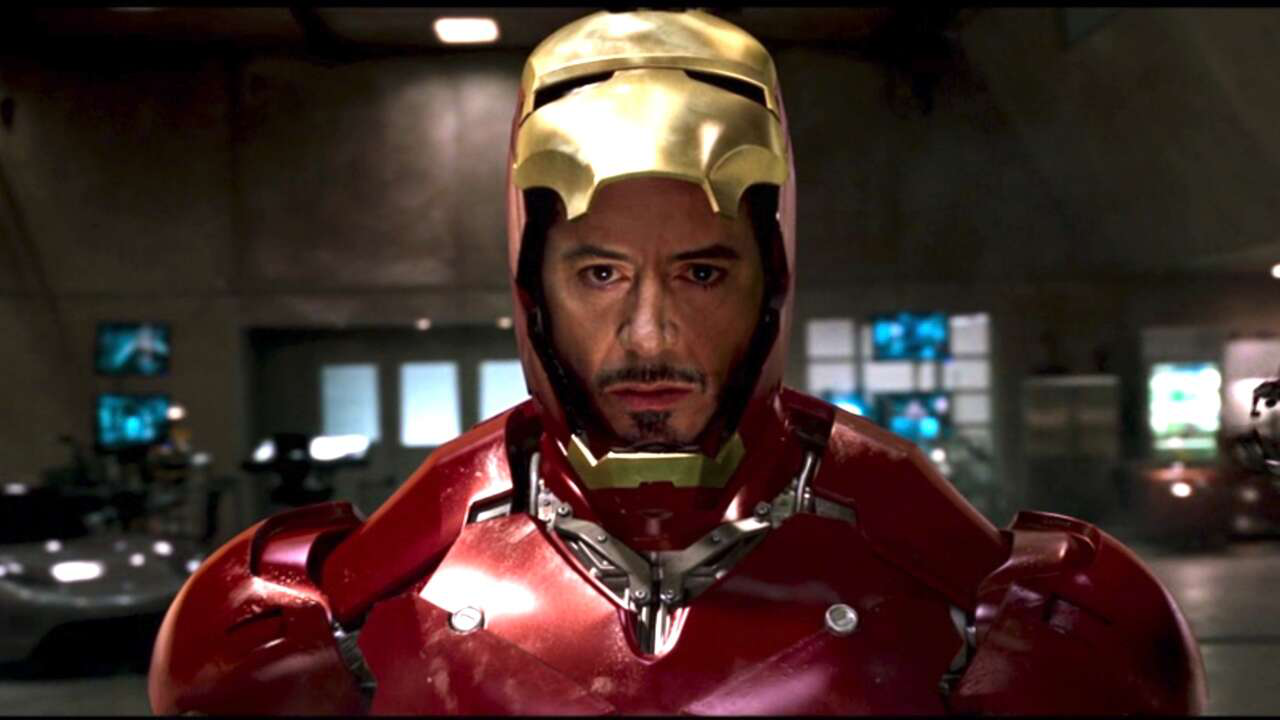

In [102]:
import random 
from PIL import Image

random.seed(42)
image_path_list = list(image.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [103]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [104]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [105]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                 transform=data_transform,
                                 target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")


Train data:
Dataset ImageFolder
    Number of datapoints: 140
    Root location: imgcls\data1\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 48
    Root location: imgcls\data1\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [106]:
class_names = train_data.classes
class_names

['blackwidow', 'ironman']

In [107]:
class_dict = train_data.class_to_idx
class_dict 

{'blackwidow': 0, 'ironman': 1}

In [108]:
len(train_data),len(test_data)

(140, 48)

In [109]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape:\n{img.shape}")
print(f"Image datatype:\n{img.dtype}")
print(f"Image label:\n{label}")
print(f"Label datatype:\n{type(label)}")

Image tensor:
tensor([[[0.8314, 0.8431, 0.8275,  ..., 0.2588, 0.3451, 0.6392],
         [0.5686, 0.5490, 0.4902,  ..., 0.2863, 0.3176, 0.5686],
         [0.3451, 0.3686, 0.4235,  ..., 0.3725, 0.3608, 0.4863],
         ...,
         [0.7490, 0.7529, 0.7569,  ..., 0.6667, 0.5961, 0.6196],
         [0.7451, 0.7490, 0.6941,  ..., 0.6235, 0.5725, 0.5765],
         [0.7333, 0.6902, 0.5843,  ..., 0.5765, 0.5490, 0.5412]],

        [[0.8745, 0.8863, 0.8667,  ..., 0.3216, 0.3765, 0.6902],
         [0.6157, 0.5961, 0.5333,  ..., 0.3608, 0.3490, 0.6157],
         [0.4000, 0.4235, 0.4745,  ..., 0.4431, 0.3843, 0.5255],
         ...,
         [0.7725, 0.7686, 0.7725,  ..., 0.7137, 0.6510, 0.6745],
         [0.7608, 0.7647, 0.7255,  ..., 0.6745, 0.6275, 0.6392],
         [0.7529, 0.7176, 0.6314,  ..., 0.6314, 0.6039, 0.5961]],

        [[0.8863, 0.8980, 0.8706,  ..., 0.3961, 0.4353, 0.7412],
         [0.6314, 0.6235, 0.5529,  ..., 0.4510, 0.4000, 0.6627],
         [0.4275, 0.4549, 0.5059,  ..., 0.52

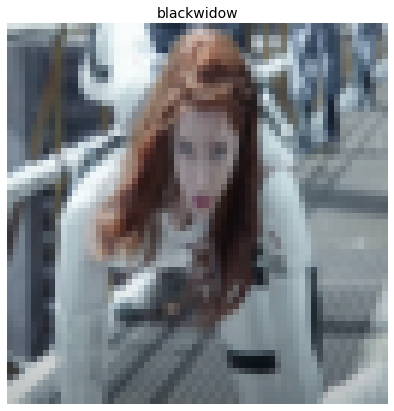

In [110]:
img_permute = img.permute(1,2,0)

plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [111]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                             batch_size= BATCH_SIZE,
                             num_workers=1,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=1,
                            shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x24abab7ebe0>,
 <torch.utils.data.dataloader.DataLoader at 0x24abab7eac0>)

In [112]:
img, label = next(iter(train_dataloader))

In [113]:
class CNN(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
        self.pool = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1)
        self.fc1 = nn.Linear(hidden_units*16*16,output_shape)
        
    def forward (self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = self.fc1(x)
        return x
    
torch.manual_seed(42)
model = CNN(input_shape=3,
               hidden_units=10,
               output_shape=len(train_data.classes)).to(device)

model

CNN(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2560, out_features=2, bias=True)
)

In [114]:
img_batch, label_batch = next(iter(train_dataloader))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single Image shape: {img_single.shape}\n")

model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single Image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0314, -0.0004]])

Output prediction probabilities:
tensor([[0.4922, 0.5078]])

Output prediction label:
tensor([1])

Actual label:
0


In [115]:
!pip install torchinfo

In [116]:
import torchinfo
from torchinfo import summary
summary(model, input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [1, 2]                    --
├─Conv2d: 1-1                            [1, 10, 64, 64]           280
├─MaxPool2d: 1-2                         [1, 10, 32, 32]           --
├─Conv2d: 1-3                            [1, 10, 32, 32]           910
├─MaxPool2d: 1-4                         [1, 10, 16, 16]           --
├─Linear: 1-5                            [1, 2]                    5,122
Total params: 6,312
Trainable params: 6,312
Non-trainable params: 0
Total mult-adds (M): 2.08
Input size (MB): 0.05
Forward/backward pass size (MB): 0.41
Params size (MB): 0.03
Estimated Total Size (MB): 0.48

In [117]:
def train__(model: torch.nn.Module,
            dataloader: torch.utils.data.DataLoader,
           loss_fn: torch.nn.Module,
           optimizer: torch.optim.Optimizer):
    model.train()
    
    train_loss, train_acc = 0, 0
    
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)
        
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [118]:
def test__(model: torch.nn.Module,
            dataloader: torch.utils.data.DataLoader,
           loss_fn: torch.nn.Module):
    model.eval()
    
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
    
     for batch, (X,y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)
        
        test_pred_logits = model(X)
        
        loss = loss_fn(test_pred_logits, y)
        test_loss += loss.item()
        
        test_pred_labels = test_pred_logits.argmax(dim=1)
        test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
     
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [119]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}
    
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc =train__(model=model,
                                         dataloader=train_dataloader,
                                         loss_fn=loss_fn,
                                         optimizer=optimizer)
        
        test_loss, test_acc = test__(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)
        
        print(
        f"Epoch: {epoch+1} "
        f"train_loss: {train_loss:.4f}"
        f"train_acc: {train_acc:.4f}"
        f"test_loss: {test_loss:.4f}"
        f"test_acc: {test_acc:.4f}"
        )
            
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
            
        return results

In [120]:
torch.manual_seed(42)


No_epochs = 1

model = CNN(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_results = train(model=model,train_dataloader=train_dataloader,test_dataloader=test_dataloader,optimizer=optimizer, loss_fn=loss_fn, epochs = No_epochs)

end_time = timer()
print(f"Total_training_time: {end_time-start_time:.3f} seconds")

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 train_loss: 0.6912train_acc: 0.5437test_loss: 0.6674test_acc: 0.6250
Total_training_time: 14.522 seconds


In [121]:
model_results.keys()
model_results

{'train_loss': [0.6911970019340515],
 'train_acc': [0.54375],
 'test_loss': [0.6674461960792542],
 'test_acc': [0.625]}